# Flow-induced dynamic instability **
## Coupled-mode flutter of an airfoil

We want to model the dynamics of a wing moving in plunge mode and torsion mode as shown in figure below. Consider a case with fuid flow  $ U$, such that  $ U_r >> 1$. The fluid forces are assumed acting on a wing section that has instantenous position defined by $\theta$ and $y$. The lift force is defined as: $F =\frac{1}{2}\rho U^2 L C_L$. Applying Newton's second law gives:  






In [3]:

from IPython.display import Image
Image('https://raw.githubusercontent.com/lm2-poly/FSI/main/Chapitre-4_Ecoulements-transverses-sur-structures-elancees/Flottement/Profil_aile.PNG')



HTTPError: HTTP Error 404: Not Found

### $\Sigma F_y$,       $m(\ddot y - \ddot\theta l_m) = -k_y y + \frac{1}{2}\rho U^2 L C_L$ ,where $C_L = a\theta$  
### $\Sigma M$,       $I\ddot\theta = -k_\theta \theta -k_y y l_m  + \frac{1}{2}\rho U^2 L (l_e + l_m) C_L$  
  
## Dimensionless quantities:
### $\tau = + \sqrt{\frac{k_\theta}{I}}$, $\Omega =\sqrt{\frac{k_y / m}{k_\theta/I}} $, $\bar{Y} = \frac{y}{L}$, $\bar{K}=\frac{k_y L}{k_\theta}$,$C_Y = \frac{\rho U^2 L^2}{2 k_\theta}$  
  
$\implies$ The non-dimensional coupled equations in flow:  

### $ \ddot{\bar{Y}} + \Omega^2 \bar{Y}= \frac{l_m}{L} \ddot \Theta + \frac{\Omega^2 C_Y a}{\bar{K}} \Theta$  
### $ \ddot \Theta + ( 1 - a C_Y \frac{l_m+l_e}{L})\Theta = - \bar{K} \frac{l_m}{L} \bar{Y} $  
  
In a matrix form:  
\begin{equation*}
\begin{bmatrix} 1 & -\frac{l_m}{L} \\ 0 & 1  \end{bmatrix}
\begin{Bmatrix}  \ddot{\bar{Y}}\\  \ddot \Theta  \end{Bmatrix}
+
\begin{bmatrix}
\Omega^2 & -\frac{\Omega^2 C_Y a}{\bar{K}} \\ \bar{K} \frac{l_m}{L} & 1 - a C_Y \frac{l_m+l_e}{L}
\end{bmatrix}
\begin{Bmatrix}  \bar{Y}\\  \Theta  \end{Bmatrix}
=
\begin{Bmatrix}  0\\  0  \end{Bmatrix}
\end{equation*}

Let the solution be: 

\begin{equation*}
\begin{Bmatrix}  \bar{Y} \\  \Theta  \end{Bmatrix}
=
\begin{Bmatrix}  \tilde Y\\  \tilde \Theta  \end{Bmatrix}
e^{iw\tau}
\end{equation*}
$\implies$
\begin{equation*}
\begin{bmatrix}
\Omega^2-w^2 & w^2\frac{l_m}{L}  - \frac{\Omega^2 C_Y a}{\bar{K}} \\ \bar{K} \frac{l_m}{L} & 1 - a C_Y \frac{l_m+l_e}{L} - w^2
\end{bmatrix}
\begin{Bmatrix}  \tilde Y\\  \tilde \Theta  \end{Bmatrix}
e^{iw\tau}
=
\begin{Bmatrix}  0\\  0  \end{Bmatrix}
\end{equation*}  

Now, by evaluating the determinant of this matrix equation, we get a quartic equation in which its roots are the natural frequencies of the system for a given $C_Y$ value. By plotting the frequencies for different $C_Y$ values, we can observe when dynamic instabiliy occurres. A demonstration on how to solve for the eigen values and eigen vectors for any general coupled problem is provided in the following code:
  
  
  
## A final remark: there is a risk of dynamic instability when the coupling is not symetric, and   when there is coincidental frequencies.  
### ** For more details please advise the course notes on moodle. You can find the lectures' vidoes in the following youtube link: https://youtube.com/playlist?list=PLELkG-6HgaYh7S1o-OO9tv06kEO-4QoBg
#### The code used followed the logic in here: https://ernie55ernie.github.io/python/2016/12/17/two-degree-freedom-system-containing-two-springs-and-two-masses.html

In [2]:
# =============================================================================
# Define libraries used
# =============================================================================

import numpy as np 
import matplotlib.pyplot as plt
import math
import scipy.linalg as la

In [3]:
# =============================================================================
# Define system parameters
# =============================================================================
Omega = math.sqrt(0.5)   
lm    = 0.25
le    = 0.25
l     = 1.0
K     = 1.0
a     = 2*math.pi 
CY  = np.linspace(0.,0.2,100)
rrt = np.zeros((len(CY),2))     # 2D array for the real part of the frequencies for each CY value
rrI = np.zeros((len(CY),2))     # 2D array for the Imaginary part of the frequencies for each CY value

In [4]:
for z in range(len(CY)):      # A loop to solve for the natural frequencies for each Omega
# =============================================================================
# Constructing the massand stiffness matrix
# =============================================================================
    m_Matrix = np.array([[1,-lm/l],[0,1]])                                                   # Mass matrix
    k_Matrix = np.array([[Omega**2,(-Omega**2*CY[z]*a)/K],[K*lm/l,1-(a*CY[z]*(lm+le)/l)]])   # Stiffness matrix
# =============================================================================
# Find the eigenvalues and eigenvactors and ordering them by magnitude of frequency
# =============================================================================
    eigens, vecs = la.eig(a = k_Matrix, b = m_Matrix)
    
    #arg = np.argsort(eigens)                          # Ordering
    #eigens = np.array(eigens)[arg]
    #vecs = np.array(vecs)[arg]
# =============================================================================
# Evaluating natural frequencies
# =============================================================================
    n_fs = np.sqrt(eigens)    # Natural frequencies for each Omega
    rrt[z] = n_fs.real        # Real part of natural frequencies for each Omega
    rrI[z] = n_fs.imag        # Imainary part of natural frequencies for each Omega

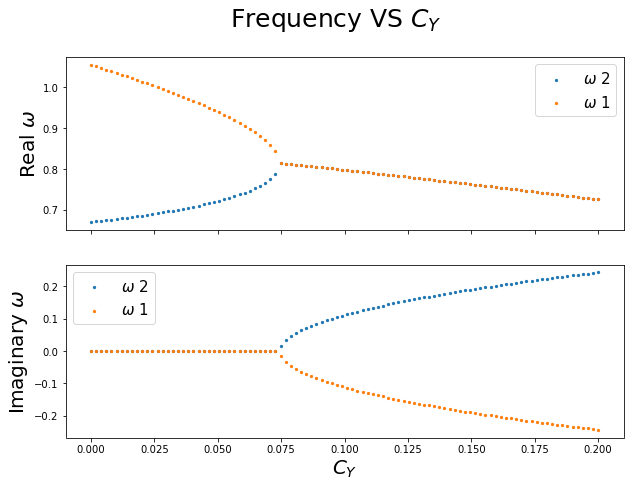

In [5]:
# =============================================================================
# Plotting
# =============================================================================
plt.rcParams['figure.figsize'] = [10, 7]
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle(r'Frequency VS $C_Y$',fontsize = 25.0)
ax1.scatter(CY,rrt[:,0],s=5)
ax1.scatter(CY,rrt[:,1],s=5)
ax2.scatter(CY,rrI[:,0],s=5)
ax2.scatter(CY,rrI[:,1],s=5)
plt.xlabel(r'$C_Y$',fontsize = 20.0)
ax1.set_ylabel('Real'' ''$\omega$',fontsize = 20.0)
ax2.set_ylabel('Imaginary'' ''$\omega$',fontsize = 20.0)
ax1.legend([r"$\omega$ 2",'$\omega$ 1'],fontsize = 15.0)
ax2.legend([r"$\omega$ 2",'$\omega$ 1'],fontsize = 15.0)
plt.show()
